# Analyzing Used Car Sales Data to Improve Sales
A quantitative study comprising used car sales data scrapped from all over the United States between April to May of 202n

SUMMARY
The market for used cars has seen growth over the years. During the pandemic, about 61% of car buyers prefered to buy from a dealership.

Over time, the recorded data has shown that the total auto sale of second-hand vehicles has increased two-fold when compared to new car sales in the US

With the number available used vehicles out there, buyers are faced with an abundance of options to choose from. This analysis seeks to understand the historical preferences of buyers and how that can be leveraged to improve the craigslist algorithm to assist buyers and seller alike.

OBJECTIVE
To improve used car sales listed on craigslist by creating a recommender system to show buyers similar listings to the one they currently view
To create a price prediction model to assist buyers and sellers on a ballpark price to expect for specific models and

DATA COLLECTION
The used car data was scraped and compiled into one place by a data contributor, Austin Reese, on kaggle website. The data contains all relevant information that craigslist provides on car sales in the United States such as vehicle price, condition, manufacturer, location, and 16 other categories. featuresd Future Work

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv("vehicles.csv")

#View the dataset
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


# Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.shape

(426880, 26)

# Remove Duplicates 

In [5]:
df.duplicated().value_counts()

False    426880
Name: count, dtype: int64

There are no duplicates in the dataframe. Here, in this case, it can be misleading because the id of two rows are different but the other values can be same. So, we will need to further analyze it.

# Removing the columns that are not required.
region_url and image_url - We don't require these columns for our analysis purpose. Although, image_url we can use when we create our recommendation model.                                                                                                                                                  
county - This column does not have any data. Kind of dummy column.                                                                                      
VIN - Identification number of the car. Not required.                                                                                                   
description - Not important in this analysis.                                                                                                           
                                                                                                                                                        
Also, removing id column to check for duplicates

In [6]:
df = df.drop(columns=['region_url','image_url','county','VIN','description','id'])

In [7]:
df.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [8]:
df.duplicated().value_counts()

False    426880
Name: count, dtype: int64

So, even after removing the id, we don't see any duplicate rows.

In [9]:
df['posting_date']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426880, dtype: object

In [10]:
df = df.dropna(subset = ['posting_date'],axis=0)

In [11]:
df['postmd'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%d') if not pd.isnull(x) else '')

In [12]:
df.postmd

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: postmd, Length: 426812, dtype: object

In [13]:
df.sort_values(by='postmd')
df.shape

(426812, 21)

# Analysing and removing missing data

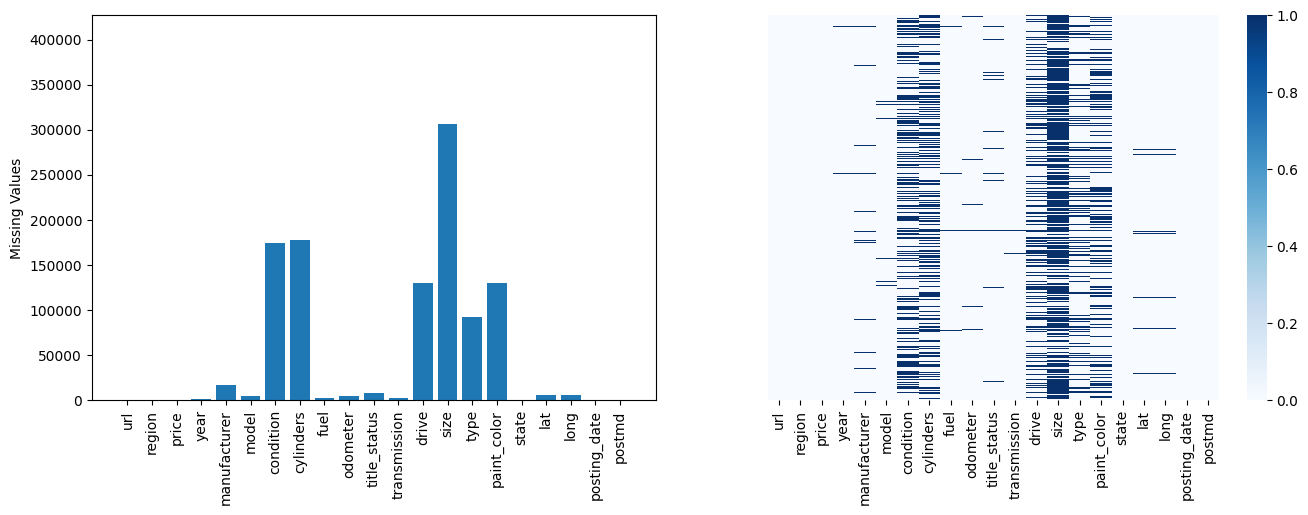

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel("Missing Values")
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation = 90)

#Second Plot
sns.heatmap(df.isna(),yticklabels=False,cmap='Blues',ax=ax2)
plt.show()

Visualizing the missing data, we see that there are quite a number of columns with a lot of missing data. Namely: size, condition, cylinders, drive, paint_color, and type. Since more than 50% of values in the size columns is missing, it will be removed.

In [15]:
#Remove the size column
df.drop(['size'],axis=1,inplace=True)

Missing values removal 1: Remove rows with missing values present in year, model, fuel, odometer and transmission as these are important information that cannot be easily obtained.                                                                                                                         
Missing values removal 2: Then, remove rows with concurrent missing values present in all of the remaining columns (manufacturer, condition, cylinders, title_status, drive, type, paint_color, lat and long) with missing values.                                                                              
Missing values removal 3: Keep rows with at least 7 non-NA values.

In [16]:
#drop missing rows in year, model, fuel, odometer, transmission
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)
df.shape

(412372, 20)

In [17]:
#drop all concurrent missing values in manufacturer, condition, cylinders, title status, drive, type, paint color, lat and long 
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, how='all', inplace=True)
df.shape

(412372, 20)

It seems there are no rows with concurrent missing values in those columns.

In [18]:
#keep rows with at least 7 non-NA values
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, thresh=7, inplace=True)
df.shape

(302583, 20)

# Remove Outliers

Search for outliers in numeric values, mainly price and odometer

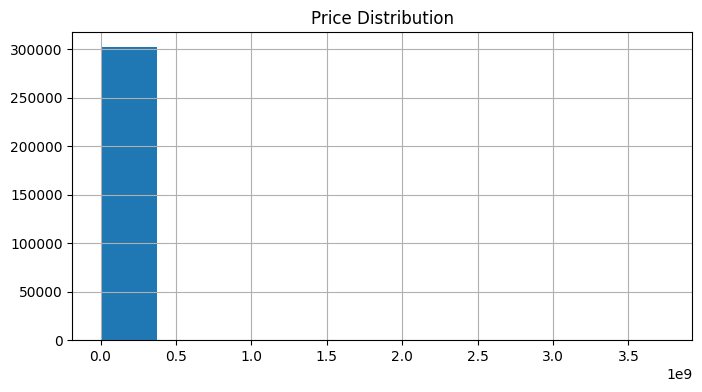

In [19]:
#Checking price column for outliers
fig, ax = plt.subplots(figsize=(8,4))
df.price.hist()
plt.title("Price Distribution")
plt.show()

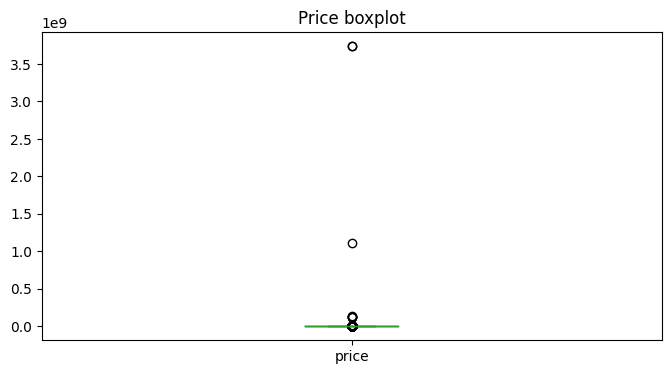

In [20]:
#Box plot for price
fig, ax = plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price boxplot')
plt.show()

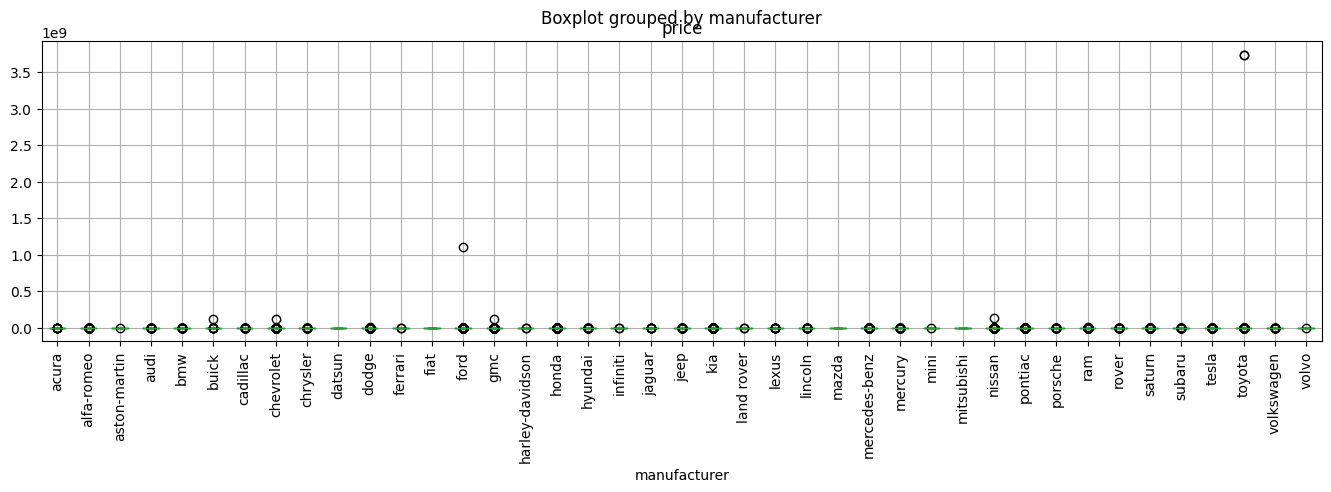

In [22]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
df.boxplot('price','manufacturer',ax=ax)
plt.xticks(rotation=90)
plt.show()

High price strangely related to ford and toyota. Might be erorr in data entry or scraping because these manufacturers are not known for high end luxury or sporting cars

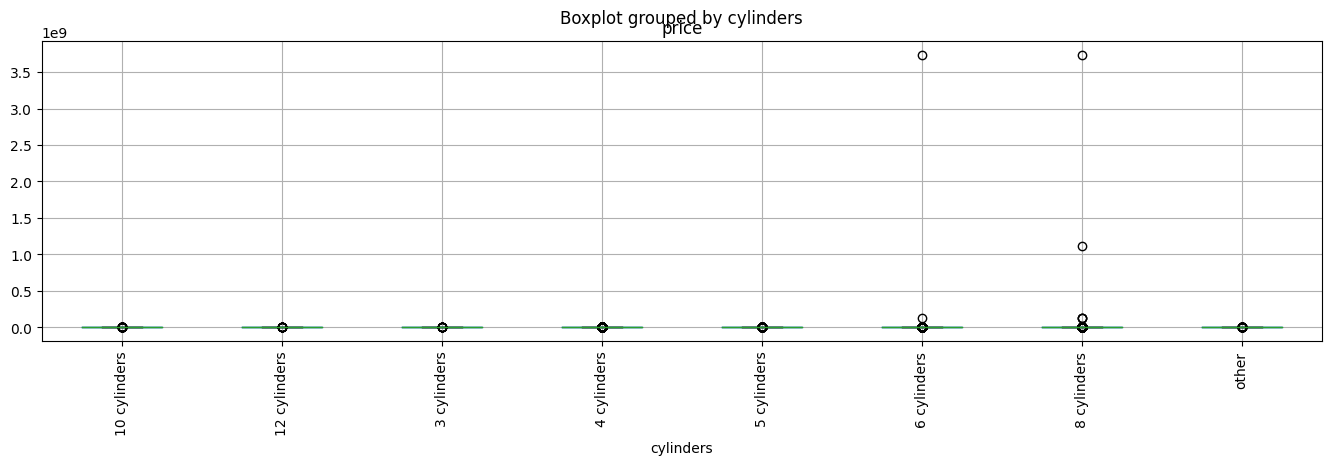

In [23]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
df.boxplot('price','cylinders',ax=ax)
plt.xticks(rotation=90)
plt.show()

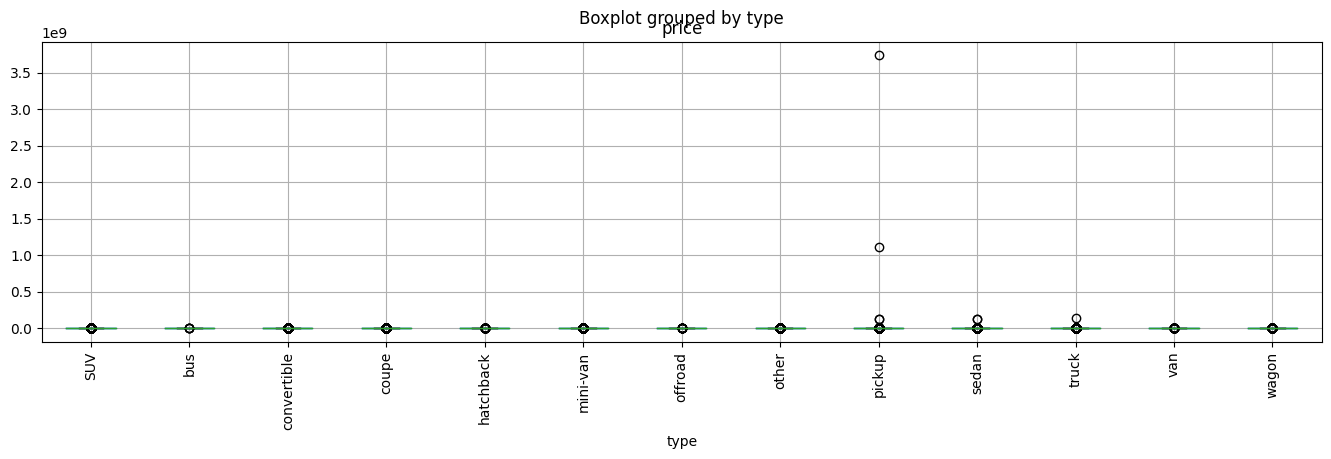

In [24]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
df.boxplot('price','type',ax=ax)
plt.xticks(rotation=90)
plt.show()

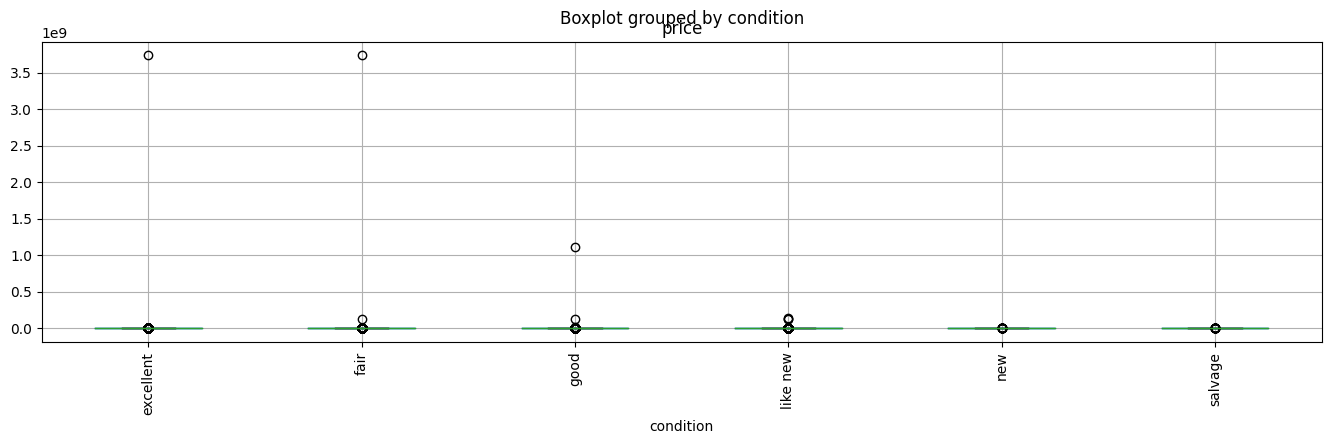

In [25]:
fig, ax = plt.subplots(1,1,figsize=(16,4))
df.boxplot('price','condition',ax=ax)
plt.xticks(rotation=90)
plt.show()

In [26]:
outlier = df.loc[((df.price>500_000)&(df.price<100_000_000))]
outlier

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,postmd
68935,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,sedan,green,ca,34.236498,-119.039074,2021-04-06T16:40:31-0700,April-06
95119,https://fortmyers.craigslist.org/col/ctd/d/nap...,ft myers / SW florida,990000,2017.0,mercedes-benz,amg g 63,NaN,8 cylinders,gas,4085.0,clean,automatic,4wd,SUV,white,fl,26.157900,-81.766548,2021-04-24T13:12:08-0400,April-24
105843,https://orlando.craigslist.org/ctd/d/orlando-d...,orlando,6995495,2014.0,dodge,journey,NaN,4 cylinders,gas,135888.0,clean,automatic,fwd,SUV,NaN,fl,28.394900,-81.417900,2021-04-28T20:11:41-0400,April-29
106361,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,516999,2016.0,NaN,Lambo Aventador SV Roadster,like new,12 cylinders,gas,9982.0,clean,automatic,4wd,convertible,white,fl,28.463700,-81.394800,2021-04-26T17:40:47-0400,April-26
136516,https://spokane.craigslist.org/cto/d/spokane-0...,spokane / coeur d'alene,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,rebuilt,automatic,4wd,pickup,black,id,47.642227,-117.348404,2021-05-02T19:27:17-0700,May-03
155421,https://terrehaute.craigslist.org/ctd/d/evansv...,terre haute,1234567,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,clean,automatic,4wd,SUV,custom,in,38.025845,-87.596457,2021-04-18T11:26:55-0400,April-18
194292,https://annarbor.craigslist.org/ctd/d/bowling-...,ann arbor,1234567,2010.0,lincoln,mkt ecoboost,like new,NaN,gas,85653.0,clean,automatic,NaN,SUV,custom,mi,41.381500,-83.650700,2021-04-16T15:15:44-0400,April-16
208617,https://saginaw.craigslist.org/cto/d/midland-2...,saginaw-midland-baycity,554900,2019.0,NaN,f250 xlt crewcab,excellent,8 cylinders,gas,25365.0,lien,automatic,4wd,pickup,white,mi,43.637500,-84.197900,2021-05-02T18:30:41-0400,May-02
219241,https://natchez.craigslist.org/cto/d/great-fal...,southwest MS,1111111,1970.0,dodge,challenger,fair,8 cylinders,gas,42000.0,clean,automatic,rwd,coupe,blue,ms,47.509800,-111.273400,2021-04-11T19:04:00-0500,April-12
327938,https://altoona.craigslist.org/cto/d/revloc-bu...,altoona-johnstown,3226714,2002.0,NaN,any and all,fair,8 cylinders,diesel,1234.0,clean,manual,4wd,sedan,blue,pa,40.480100,-78.726300,2021-04-29T18:24:17-0400,April-29


There seem to be errors in the price values. It seems random and intentionally set to various price extremes.

There also seem to be an issue with some of the pricing for the cars. For example, the 2002 saturn Lseries has an average resale value of 5,000 USD but here it shows 2,000,000 USD. Either there is entry error or error from data scraping.

Also, some of the odometer readins seem unreasonable. For example, the odometer reading for a 2017 mercedez benz amg G63 (item 95119) is only 4,085 km. So it would be wise to use a reasonable start and limit for the odometer reading for this analysis

In [31]:
test = df.loc[((df.manufacturer == 'tesla'))]
test

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,postmd
1008,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,29890,2013.0,tesla,model s,NaN,NaN,electric,61591.0,clean,automatic,rwd,sedan,grey,al,33.669601,-86.817617,2021-04-20T04:50:54-0500,April-20
1333,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,32990,2013.0,tesla,model s,NaN,NaN,electric,69961.0,clean,automatic,rwd,sedan,white,al,33.669601,-86.817617,2021-04-14T04:50:50-0500,April-14
1806,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,29890,2013.0,tesla,model s,NaN,NaN,electric,61591.0,clean,automatic,rwd,sedan,grey,al,33.669601,-86.817617,2021-04-04T10:01:09-0500,April-04
2901,https://huntsville.craigslist.org/ctd/d/decatu...,huntsville / decatur,32990,2013.0,tesla,model s signature,good,NaN,electric,62588.0,clean,other,rwd,sedan,white,al,34.570000,-86.980000,2021-04-27T14:31:19-0500,April-27
3263,https://huntsville.craigslist.org/ctd/d/new-ca...,huntsville / decatur,29890,2013.0,tesla,model s,NaN,NaN,electric,61591.0,clean,automatic,rwd,sedan,grey,al,33.669601,-86.817617,2021-04-20T04:51:06-0500,April-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424599,https://milwaukee.craigslist.org/ctd/d/milwauk...,milwaukee,49990,2020.0,tesla,model 3 long range sedan,good,NaN,electric,3996.0,clean,other,NaN,sedan,white,wi,43.060000,-87.960000,2021-04-18T08:02:43-0500,April-18
425311,https://sheboygan.craigslist.org/ctd/d/sheboyg...,sheboygan,36590,2019.0,tesla,model 3 standard range,good,NaN,electric,23057.0,clean,other,rwd,sedan,white,wi,43.700000,-87.740000,2021-04-30T11:51:04-0500,April-30
425611,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,37990,2019.0,tesla,model 3 standard range,good,NaN,electric,22544.0,clean,other,rwd,sedan,white,wi,44.960000,-89.640000,2021-05-03T15:11:06-0500,May-03
425747,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,32990,2013.0,tesla,model s signature,good,NaN,electric,62588.0,clean,other,rwd,sedan,white,wi,44.960000,-89.640000,2021-04-27T13:51:11-0500,April-27


There are no used tesla cars being sold for less than 30,000 USD in good condition

We shall therefore set a reasonable price range of between 1,000 USD and 200,000 USD.

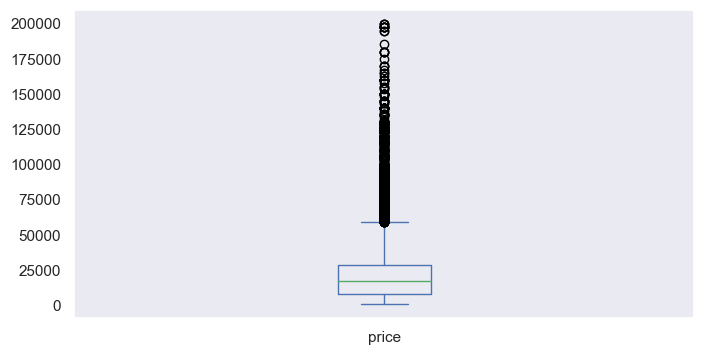

In [36]:
#filter data for price between 1k and 150k
df2 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df2.price.plot(kind='box')
ax2.set_title('1,000 - 200,000 price range')
plt.grid(False)

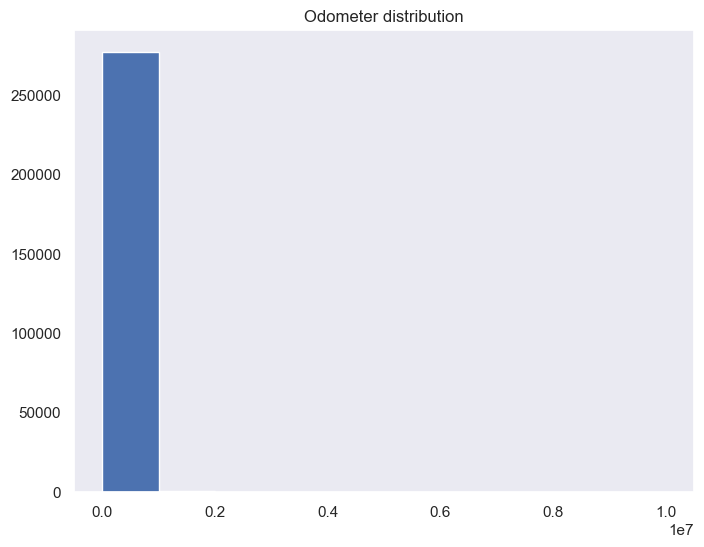

In [37]:
#check the odometer column for outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.hist()
plt.title('Odometer distribution')
plt.grid(False)

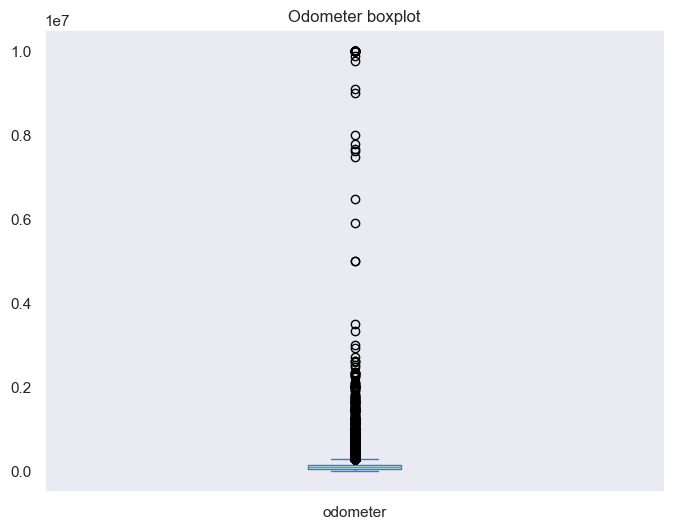

In [38]:
#use boxplots to find outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.plot(kind='box')
plt.title('Odometer boxplot')
plt.grid(False)

There seem to be a lot of outliers and abnormalities in the odometer readings. To address this, we consider that the average mileage per year in the US is 14,000 miles (22,500 km). And assuming the minimum age of a car is 2, In the spirit of the analysis purpose, we assume the minimum age of a listed car is 2 yrs, so we shall filter the odometer readings between 45,000 km and 500,000 km (28,000 to 300,000 miles) driven

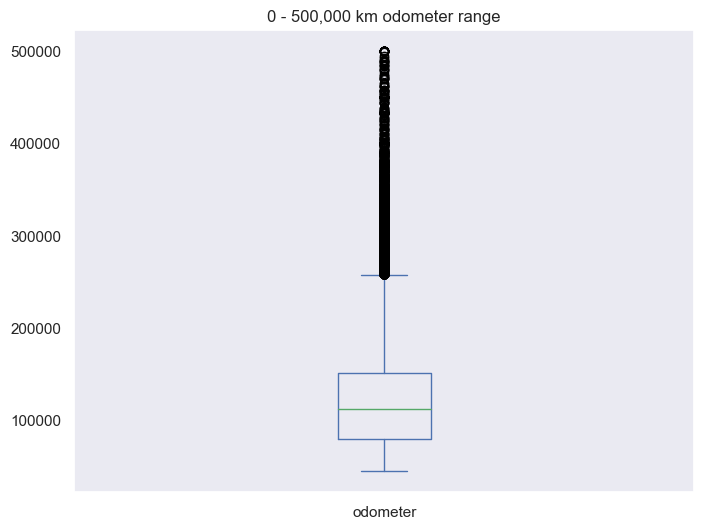

In [39]:
df3 = df2.loc[(df2.odometer >= 45_000) & (df2.odometer <= 500_000)]
fig,(ax)=plt.subplots(figsize=(8,6))
df3.odometer.plot(kind='box')
ax.set_title('0 - 500,000 km odometer range')
plt.grid(None)

In [40]:
#Saving the dataset
df3.to_csv('vehicles_cleaned.csv',index=False)